<a href="https://colab.research.google.com/github/Shaileshps21/pytorch-/blob/main/pytorch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASETS AND DATA LOADER

# ANN CREATION WITHOUT AND WITH GPU
using Fashion mnist

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset , DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
torch.manual_seed(42)
# set random seeeds for reproducibility

In [ ]:
df = pd.read_csv('fmnist_small.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


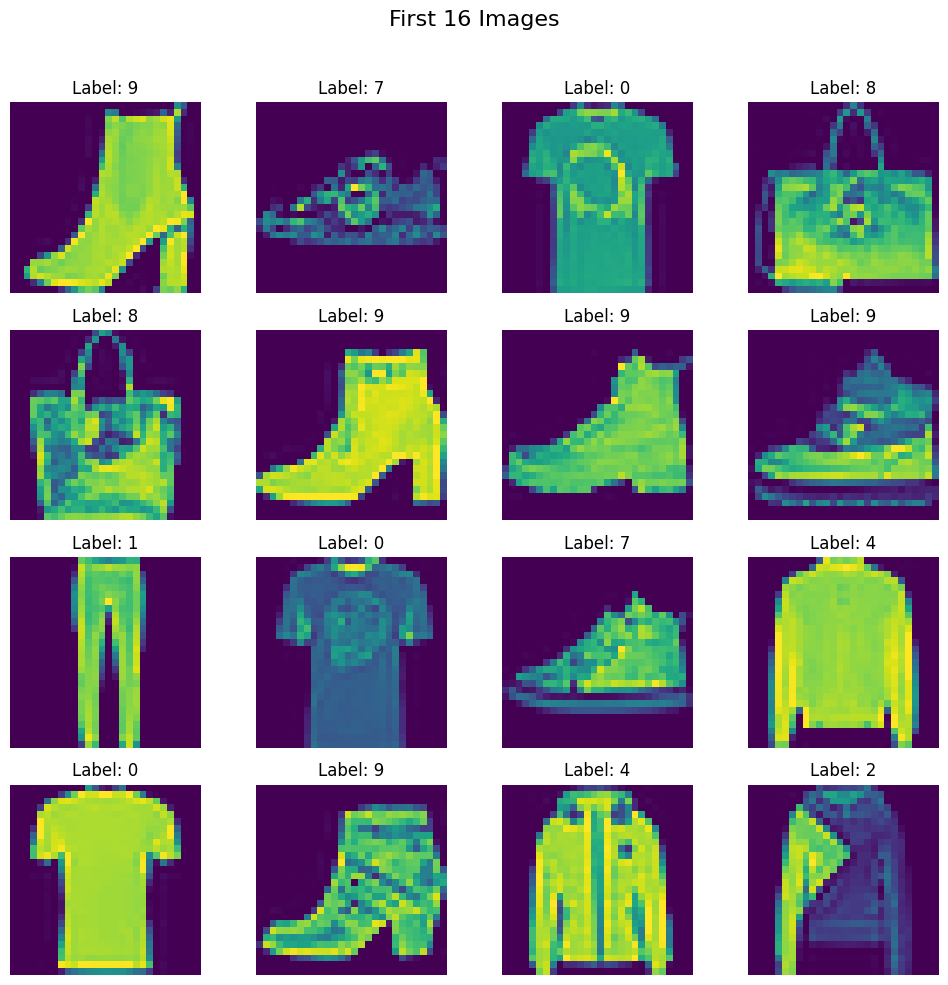

In [ ]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [ ]:
# train test split
x = df.iloc[: , 1:]
y = df.iloc[: , 0]

X_train , X_test, y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state=42)

# scaling the features
X_train = X_train/255.0
X_test  = X_test/255.

In [ ]:
# create CustomDataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features , dtype= torch.float32)
    self.labels   = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index] , self.labels[index]

In [ ]:
# create train dataset object
train_dataset = CustomDataset(X_train.values , y_train.values)

print(len(train_dataset))
print()
train_dataset[0]

4800



(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
test_dataset = CustomDataset(X_test.values , y_test.values)
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
# create a train and test loader
train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True)
test_loader  = DataLoader(test_dataset  , batch_size=32 , shuffle=True)

In [ ]:
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features , 128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32)
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
learning_rate = 0.01
epochs = 100

In [ ]:
# instantiate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters() , lr= learning_rate)

In [ ]:
# training loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features , batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # loss calculation
    loss = criterion(outputs, batch_labels)

    # backpropogation
    optimizer.zero_grad()
    loss.backward()

    # parameter updation
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  # avg loss
  avg_epoch_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch : {epoch + 1} , Loss : {avg_epoch_loss}")

Epoch : 1 , Loss : 3.05717129389445
Epoch : 2 , Loss : 2.0017743134498596
Epoch : 3 , Loss : 1.4481083671251933
Epoch : 4 , Loss : 1.1542654124895733
Epoch : 5 , Loss : 1.0030607918898264
Epoch : 6 , Loss : 0.9098642071088155
Epoch : 7 , Loss : 0.8552001982927322
Epoch : 8 , Loss : 0.8110853219032288
Epoch : 9 , Loss : 0.7766458674271901
Epoch : 10 , Loss : 0.7416149735450744
Epoch : 11 , Loss : 0.7160944040616354
Epoch : 12 , Loss : 0.6911902453502019
Epoch : 13 , Loss : 0.6712886426846186
Epoch : 14 , Loss : 0.6561312093337377
Epoch : 15 , Loss : 0.6326052782932917
Epoch : 16 , Loss : 0.6200426463286082
Epoch : 17 , Loss : 0.6063517077763876
Epoch : 18 , Loss : 0.5941688064734141
Epoch : 19 , Loss : 0.5756983937819798
Epoch : 20 , Loss : 0.5663128463427226
Epoch : 21 , Loss : 0.5523342646161715
Epoch : 22 , Loss : 0.5485397702455521
Epoch : 23 , Loss : 0.5358087103565534
Epoch : 24 , Loss : 0.5322153025865555
Epoch : 25 , Loss : 0.5174861393372218
Epoch : 26 , Loss : 0.50870739758014

In [ ]:
# set model to eval mode as the model contains features that behaves differently
# during the training and test / generation / prediction
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
)

In [ ]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    # forward pass
    outputs = model(batch_features)

    _, predicted = torch.max(outputs ,1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8366666666666667


IN THIS WE WILL LEARN ON HOW TO TRAIN THE MODEL ON GPU

using device: cuda


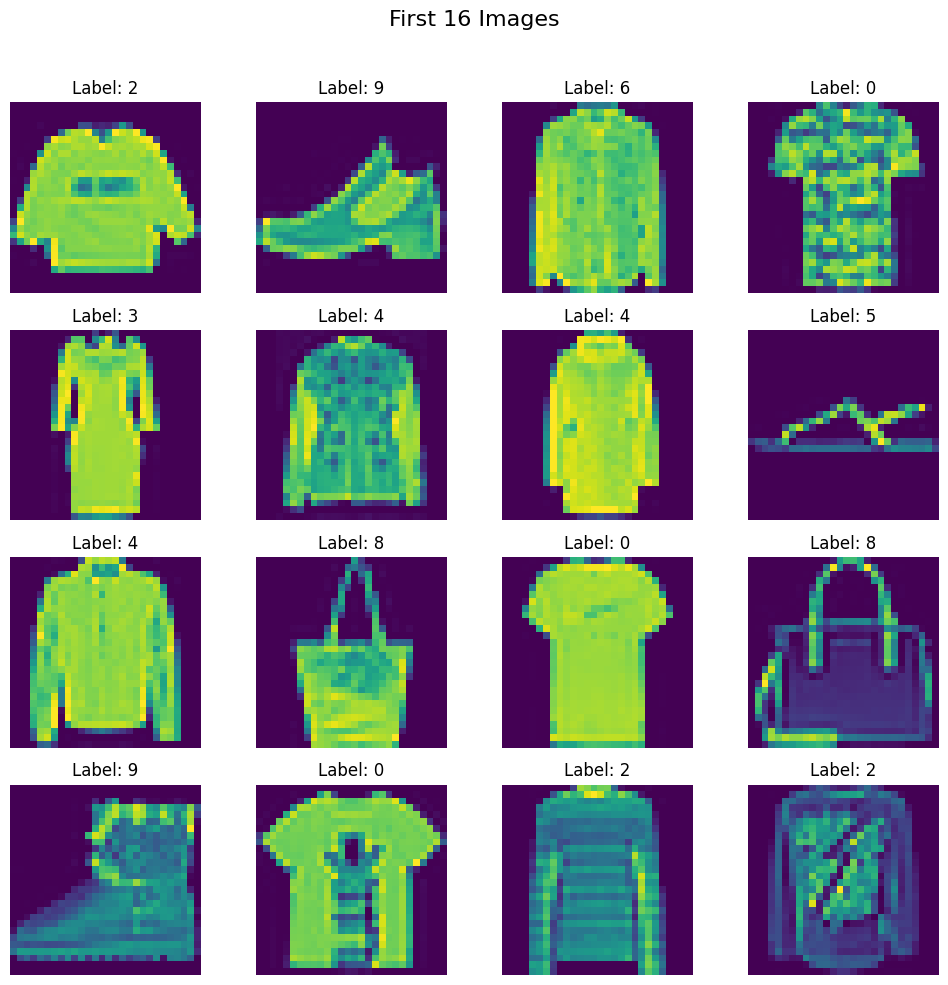

In [ ]:
# LIBRARY ALREADY IMPORTED
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset , DataLoader
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split


torch.manual_seed(42)
# set random seeeds for reproducibility

# CHECK FOR GPU AVAILABILITY
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"using device: {device}")

df = pd.read_csv('fashion-mnist_train.csv')
df

# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [ ]:
# train test split
x = df.iloc[: , 1:]
y = df.iloc[: , 0]

X_train , X_test, y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state=42)

# scaling the features
X_train = X_train/255.0
X_test  = X_test/255.0


# create CustomDataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features , dtype= torch.float32)
    self.labels   = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index] , self.labels[index]

In [ ]:
# create train dataset object
train_dataset = CustomDataset(X_train.values , y_train.values)

print(len(train_dataset))
print()
train_dataset[0]

# create test dataset object
test_dataset = CustomDataset(X_test.values , y_test.values)
test_dataset[0]

# create a train and test loader
train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True , pin_memory=True)
test_loader  = DataLoader(test_dataset  , batch_size=32 , shuffle=True , pin_memory=True)

28001



In [ ]:
learning_rate = 0.01
epochs = 100

# instantiate the model
model = MyNN(X_train.shape[1])
# MOVE MODEL TO GPU
model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters() , lr= learning_rate)

# training loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features , batch_labels in train_loader:
    MOVE DATA TO GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # loss calculation
    loss = criterion(outputs, batch_labels)

    # backpropogation
    optimizer.zero_grad()
    loss.backward()

    # parameter updation
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  # avg loss
  avg_epoch_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch : {epoch + 1} , Loss : {avg_epoch_loss}")

Epoch: 1 , Loss: nan
Epoch: 2 , Loss: nan
Epoch: 3 , Loss: nan
Epoch: 4 , Loss: nan
Epoch: 5 , Loss: nan
Epoch: 6 , Loss: nan
Epoch: 7 , Loss: nan
Epoch: 8 , Loss: nan
Epoch: 9 , Loss: nan
Epoch: 10 , Loss: nan
Epoch: 11 , Loss: nan
Epoch: 12 , Loss: nan
Epoch: 13 , Loss: nan
Epoch: 14 , Loss: nan
Epoch: 15 , Loss: nan
Epoch: 16 , Loss: nan
Epoch: 17 , Loss: nan
Epoch: 18 , Loss: nan
Epoch: 19 , Loss: nan
Epoch: 20 , Loss: nan
Epoch: 21 , Loss: nan
Epoch: 22 , Loss: nan
Epoch: 23 , Loss: nan
Epoch: 24 , Loss: nan
Epoch: 25 , Loss: nan
Epoch: 26 , Loss: nan
Epoch: 27 , Loss: nan
Epoch: 28 , Loss: nan
Epoch: 29 , Loss: nan
Epoch: 30 , Loss: nan
Epoch: 31 , Loss: nan
Epoch: 32 , Loss: nan
Epoch: 33 , Loss: nan
Epoch: 34 , Loss: nan
Epoch: 35 , Loss: nan
Epoch: 36 , Loss: nan
Epoch: 37 , Loss: nan
Epoch: 38 , Loss: nan
Epoch: 39 , Loss: nan
Epoch: 40 , Loss: nan
Epoch: 41 , Loss: nan
Epoch: 42 , Loss: nan
Epoch: 43 , Loss: nan
Epoch: 44 , Loss: nan
Epoch: 45 , Loss: nan
Epoch: 46 , Loss: n

In [ ]:
# set model to eval mode as the model contains features that behaves differently
# during the training and test / generation / prediction
model.eval()

# evaluation code
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    # MOVE DATA TO GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    _, predicted = torch.max(outputs ,1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.0977003285244965


In [ ]:
# set model to eval mode as the model contains features that behaves differently
# during the training and test / generation / prediction
model.eval()

# evaluation code
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    # MOVE DATA TO GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    _, predicted = torch.max(outputs ,1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.0977003285244965
